<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-05-07 07:18:52--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  45.1MB/s    in 4.4s    

2025-05-07 07:18:56 (46.3 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [6]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [7]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [8]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [9]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


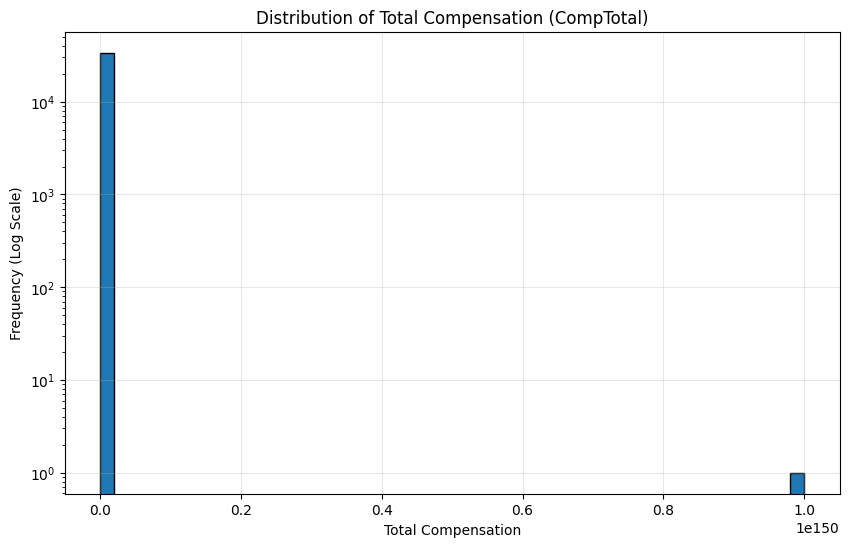

In [10]:
## Write your code here
# Query to select CompTotal from the main table
QUERY = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL"

# Read the data into a pandas DataFrame
df_comp = pd.read_sql_query(QUERY, conn)

# Create a histogram of CompTotal
plt.figure(figsize=(10, 6))
plt.hist(df_comp['CompTotal'], bins=50, edgecolor='black', log=True)  # Using log scale due to wide range of values
plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency (Log Scale)')
plt.grid(True, alpha=0.3)
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


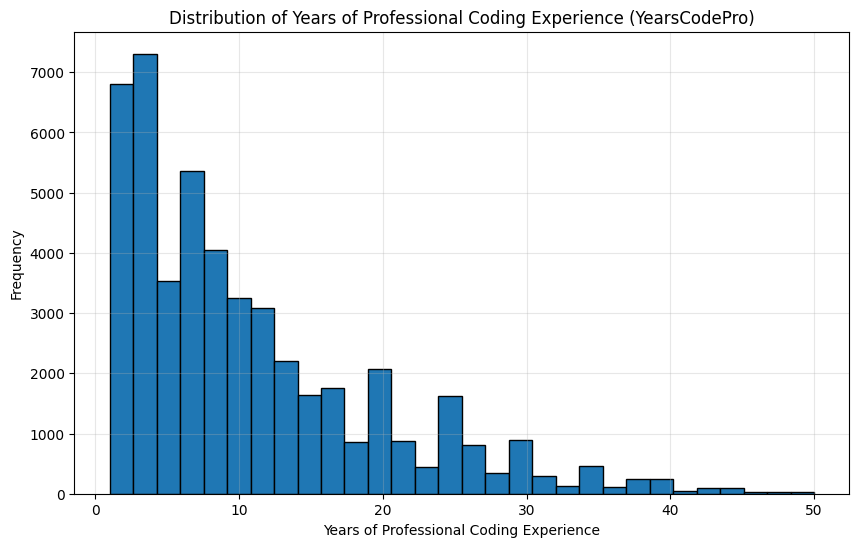

In [11]:
## Write your code here
# Query to select YearsCodePro from the main table
QUERY = "SELECT YearsCodePro FROM main WHERE YearsCodePro IS NOT NULL"

# Read the data into a pandas DataFrame
df_years = pd.read_sql_query(QUERY, conn)

# Convert YearsCodePro to numeric, handling non-numeric values
df_years['YearsCodePro'] = pd.to_numeric(df_years['YearsCodePro'], errors='coerce')

# Create a histogram of YearsCodePro
plt.figure(figsize=(10, 6))
plt.hist(df_years['YearsCodePro'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Years of Professional Coding Experience (YearsCodePro)')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


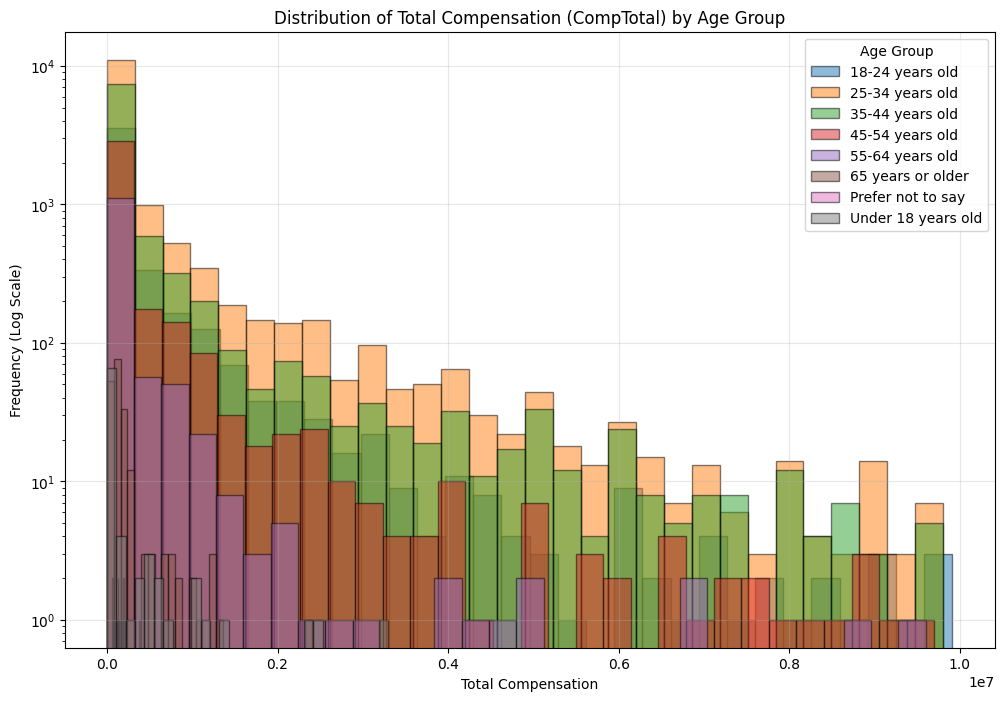

In [12]:
## Write your code here
# Query to select CompTotal and Age from the main table
QUERY = """
SELECT CompTotal, Age 
FROM main 
WHERE CompTotal IS NOT NULL AND Age IS NOT NULL
"""

# Read the data into a pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Remove extreme outliers (e.g., CompTotal > 1e7 for better visualization)
df = df[df['CompTotal'] < 1e7]

# Create a figure with subplots
plt.figure(figsize=(12, 8))

# Get unique age groups
age_groups = df['Age'].unique()

# Plot histograms for each age group
for age in sorted(age_groups):
    subset = df[df['Age'] == age]['CompTotal']
    plt.hist(subset, bins=30, alpha=0.5, label=age, edgecolor='black', log=True)

# Customize the plot
plt.title('Distribution of Total Compensation (CompTotal) by Age Group')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency (Log Scale)')
plt.legend(title='Age Group')
plt.grid(True, alpha=0.3)
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


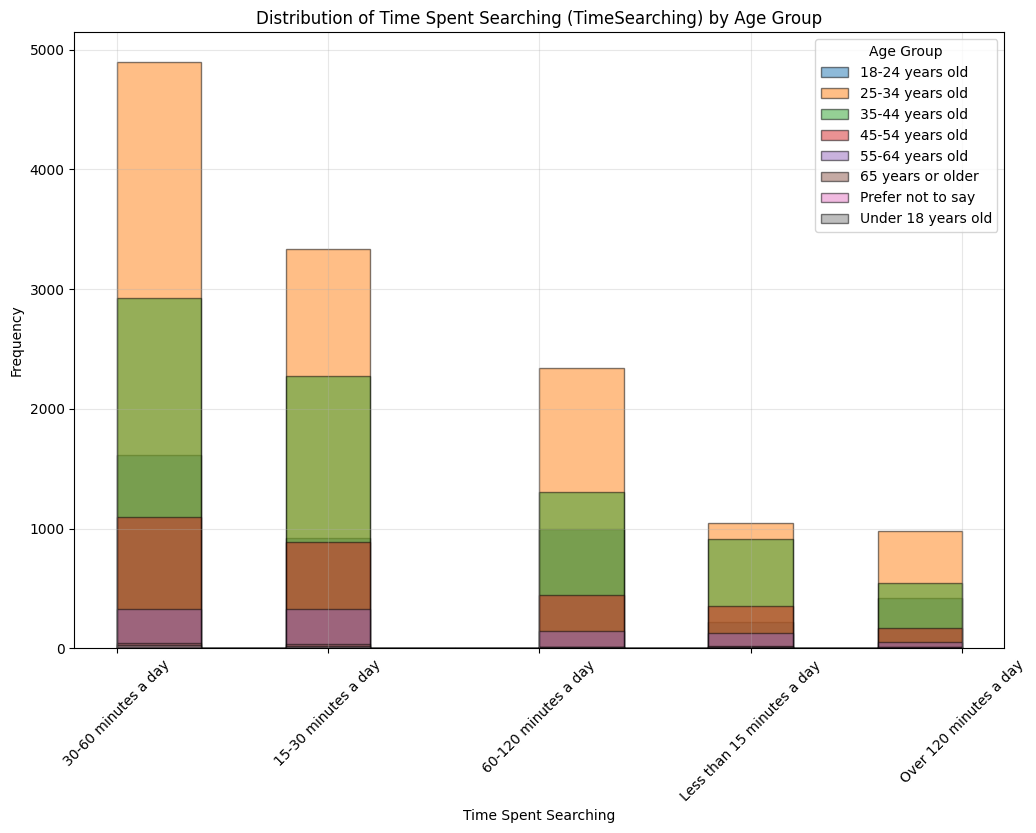

In [13]:
## Write your code here
# Query to select TimeSearching and Age from the main table
QUERY = """
SELECT TimeSearching, Age 
FROM main 
WHERE TimeSearching IS NOT NULL AND Age IS NOT NULL
"""

# Read the data into a pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Create a figure with subplots
plt.figure(figsize=(12, 8))

# Get unique age groups
age_groups = df['Age'].unique()

# Plot histograms for each age group
for age in sorted(age_groups):
    subset = df[df['Age'] == age]['TimeSearching']
    plt.hist(subset, bins=10, alpha=0.5, label=age, edgecolor='black')

# Customize the plot
plt.title('Distribution of Time Spent Searching (TimeSearching) by Age Group')
plt.xlabel('Time Spent Searching')
plt.ylabel('Frequency')
plt.legend(title='Age Group')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


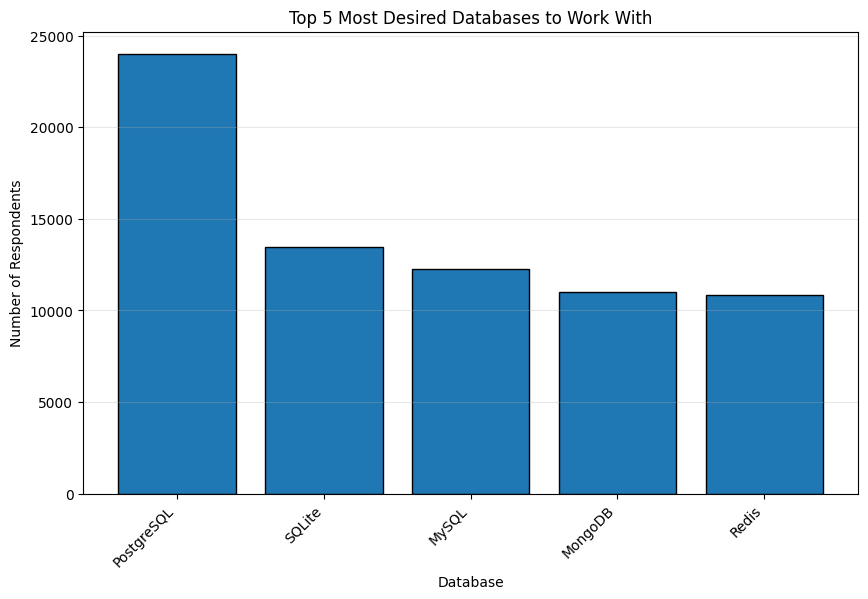

In [14]:
## Write your code here
# Query to select DatabaseWantToWorkWith from the main table
QUERY = """
SELECT DatabaseWantToWorkWith 
FROM main 
WHERE DatabaseWantToWorkWith IS NOT NULL
"""

# Read the data into a pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Split semicolon-separated values and explode into individual databases
databases = df['DatabaseWantToWorkWith'].str.split(';').explode().str.strip()

# Count occurrences of each database
db_counts = databases.value_counts()

# Select the top 5 databases
top_5_dbs = db_counts.head(5)

# Create a histogram (bar-like) for the top 5 databases
plt.figure(figsize=(10, 6))
plt.bar(top_5_dbs.index, top_5_dbs.values, edgecolor='black')
plt.title('Top 5 Most Desired Databases to Work With')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(True, alpha=0.3, axis='y')
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


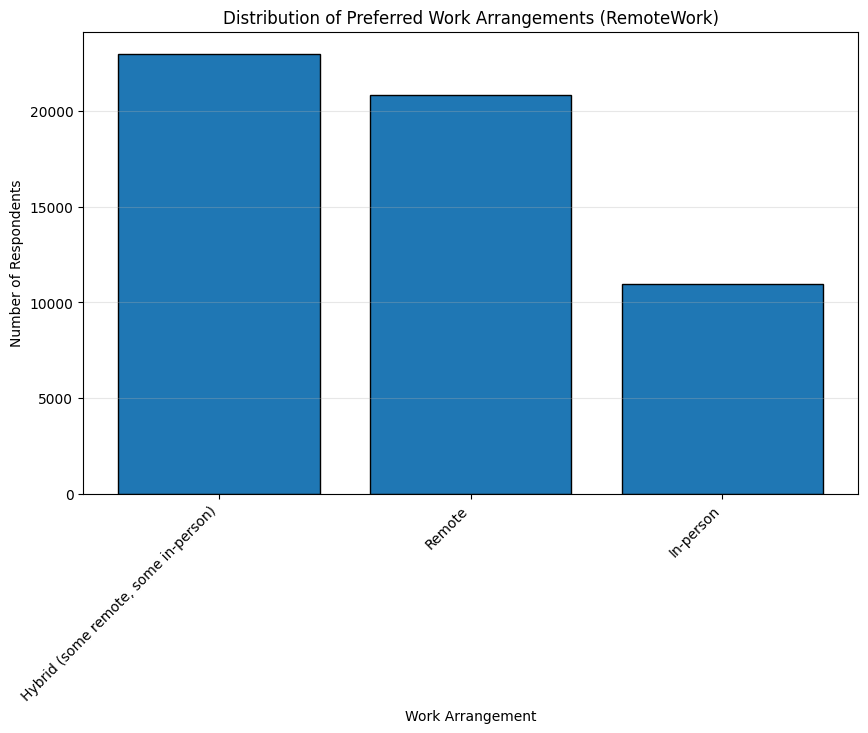

In [15]:
## Write your code here
# Query to select RemoteWork from the main table
QUERY = """
SELECT RemoteWork 
FROM main 
WHERE RemoteWork IS NOT NULL
"""

# Read the data into a pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Count occurrences of each RemoteWork category
remote_counts = df['RemoteWork'].value_counts()

# Create a histogram (bar-like) for RemoteWork
plt.figure(figsize=(10, 6))
plt.bar(remote_counts.index, remote_counts.values, edgecolor='black')
plt.title('Distribution of Preferred Work Arrangements (RemoteWork)')
plt.xlabel('Work Arrangement')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(True, alpha=0.3, axis='y')
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


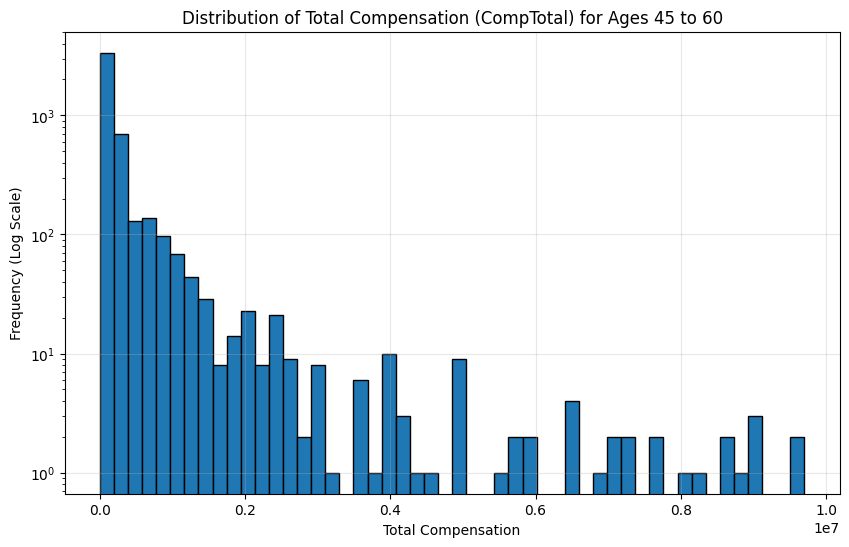

In [16]:
## Write your code here
# Query to select CompTotal for respondents aged 45 to 60
QUERY = """
SELECT CompTotal 
FROM main 
WHERE CompTotal IS NOT NULL 
AND Age IN ('45-54 years old', '55-64 years old')
"""

# Read the data into a pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Remove extreme outliers (e.g., CompTotal > 1e7 for better visualization)
df = df[df['CompTotal'] < 1e7]

# Create a histogram of CompTotal
plt.figure(figsize=(10, 6))
plt.hist(df['CompTotal'], bins=50, edgecolor='black', log=True)
plt.title('Distribution of Total Compensation (CompTotal) for Ages 45 to 60')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency (Log Scale)')
plt.grid(True, alpha=0.3)
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


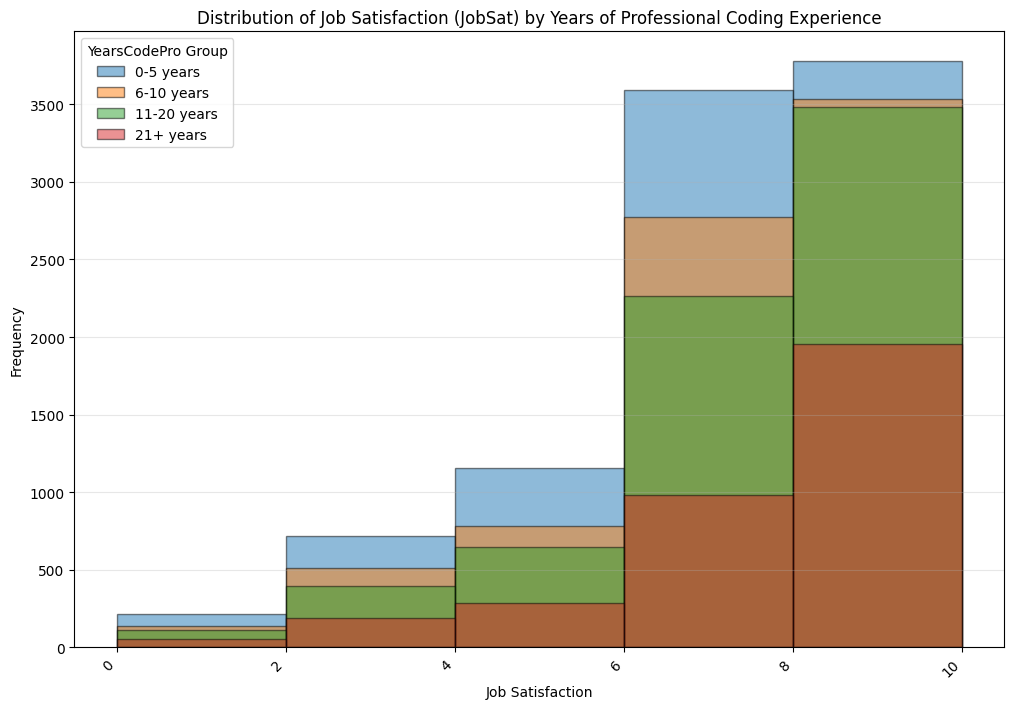

In [17]:
## Write your code here
# Query to select JobSat and YearsCodePro from the main table
QUERY = """
SELECT JobSat, YearsCodePro 
FROM main 
WHERE JobSat IS NOT NULL AND YearsCodePro IS NOT NULL
"""

# Read the data into a pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Convert YearsCodePro to numeric, handling non-numeric values
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows with NaN values after conversion
df = df.dropna()

# Create bins for YearsCodePro (e.g., 0-5, 6-10, 11-20, 21+ years)
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5 years', '6-10 years', '11-20 years', '21+ years']
df['YearsCodeProGroup'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, include_lowest=True)

# Create a figure
plt.figure(figsize=(12, 8))

# Plot histograms for each YearsCodePro group
for group in labels:
    subset = df[df['YearsCodeProGroup'] == group]['JobSat']
    plt.hist(subset, bins=5, alpha=0.5, label=group, edgecolor='black')

# Customize the plot
plt.title('Distribution of Job Satisfaction (JobSat) by Years of Professional Coding Experience')
plt.xlabel('Job Satisfaction')
plt.ylabel('Frequency')
plt.legend(title='YearsCodePro Group')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(True, alpha=0.3, axis='y')
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [18]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
